In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

df = pd.read_csv("/content/drive/MyDrive/encoders (1).csv")

df[["difference"]]= df[['err']].apply(lambda x: x-12)

df.drop(labels=["created_at","minf","maxf","errf"],inplace=True,axis="columns")


df.at[304, 'min'] = 33509
df.at[1553, 'updated_at'] = '2018-01-25 23:23:40.893050' 
df.at[586, 'updated_at'] = '2018-01-04 12:38:43.729483' 
df.at[601, 'updated_at'] = '2018-01-04 12:38:43.729483'


df['date'] = pd.to_datetime(df['date'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

df['days_diff'] = df['updated_at'] - df['date']

df['days_diff'] = df.days_diff.astype('object')

df['days_diff'] = df["days_diff"].apply(lambda x:str(x)[:2])

df = df.apply(lambda x:x.replace(-0.0,np.NaN))
df = df.apply(lambda x:x.replace(-1,np.NaN))
df = df.apply(lambda x:x.replace('Na',np.NaN))
df = df.apply(lambda x:x.replace('NaT',np.NaN))

df.dropna(axis="rows",inplace=True)


df['days_diff'] = df["days_diff"].astype('int64')


def sur_cal_new(x):
  
    if x > -2:
      return 4

    elif -2 >= x and x >= -4:
      return 8

    elif -4 >= x >= -6 :
      return 20

    elif -6 >= x >= -8:
      return 28

    elif -8 >= x >=-10 :
      return 35

    elif -10 >= x >=-12 :
      return 38

    elif -12 >= x >=-14 :
      return 42

    else:
      return 0

df["survival"] = df["difference"].apply(lambda x: sur_cal_new(x))


df.at[[304, 586, 601, 1446, 1512, 1553, 1766, 1771],'survival'] = (df[df['difference']>0]['days_diff'].values) * -1

# df1= df

# cdfetrzdfdf

del df['days_diff']
del df['difference']
del df['updated_at']
del df['date']
del df['scanner']
del df['id']




X = df.drop(labels='survival', axis=1)
y = df['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)





model_RTR = RandomForestRegressor()

model_RTR.fit(X_train,y_train)

y_pred_RTR = model_RTR.predict(X_test)

In [ ]:
print('MSE for RTR',mean_squared_error(y_test,y_pred_RTR))
print("R2 score for RTR",r2_score(y_test,y_pred_RTR))

MSE for RTR 0.9232282271944922
R2 score for RTR 0.9753615380930011


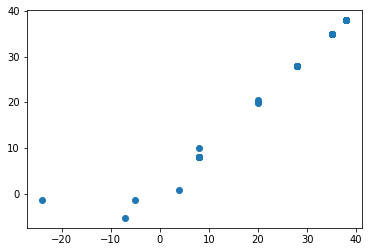

In [ ]:
plt.scatter(x=y_test,y=y_pred_RTR)